# 📘 YouTube Comments Sentiment Analysis

A beginner-friendly NLP project to classify YouTube comments as positive or negative using classical machine learning techniques.

In [1]:
# 📦 Install necessary libraries (only run once if not already installed)
!pip install nltk spacy matplotlib seaborn scikit-learn pandas numpy

# ✅ Download required NLTK and spaCy resources
import nltk
nltk.download('stopwords')
nltk.download('punkt')

import spacy
!python -m spacy download en_core_web_sm


[nltk_data] Downloading package stopwords to /Users/razi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/razi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.8.0/en_core_web_sm-3.8.0-py3-none-any.whl (12.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import spacy

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load SpaCy model
nlp = spacy.load('en_core_web_sm')
stop_words = set(stopwords.words('english'))

plt.style.use('default')
sns.set_palette("husl")


In [3]:
# 📂 Load dataset
df = pd.read_csv('YoutubeCommentsDataSet.csv')

# Display info
print("First 5 rows:")
display(df.head())
print("\nClass distribution:")
display(df['Sentiment'].value_counts())


First 5 rows:


,Comment,Sentiment
0,lets not forget that apple pay in 2014 require...,neutral
1,here in nz 50 of retailers don’t even have con...,negative
2,i will forever acknowledge this channel with t...,positive
3,whenever i go to a place that doesn’t take app...,negative
4,apple pay is so convenient secure and easy to ...,positive



Class distribution:


Sentiment
positive    11432
neutral      4638
negative     2338
Name: count, dtype: int64

In [4]:
def preprocess_text(text):
    if pd.isna(text) or text is None:
        return ""
    text = str(text).lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = nltk.word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    doc = nlp(' '.join(tokens))
    lemmas = [token.lemma_ for token in doc]
    return ' '.join(lemmas)


In [5]:
# Filter to only positive/negative
df = df[df['Sentiment'].isin(['positive', 'negative'])].copy()
df = df.dropna(subset=['Comment'])
df = df[df['Comment'].str.strip() != '']

# Preprocess all comments
df['cleaned_comment'] = df['Comment'].apply(preprocess_text)

# Show sample cleaned
df[['Comment', 'cleaned_comment']].sample(5)


,Comment,cleaned_comment
2382,finally someone who gets properly into it than...,finally someone get properly thank man
13542,i am a chem teacher and am relying on your vid...,chem teacher rely video covid19 site one find ...
12047,honestly for me at least knowing that there wi...,honestly least know another opportunity really...
404,just discovered your channel and the series go...,discover channel series going watch old one to...
8484,ojala hagas mas asmr con palabras en español p...,ojala hagas mas asmr con palabras en español p...


In [6]:
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X = vectorizer.fit_transform(df['cleaned_comment'])
y = df['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [7]:
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)
print("✅ Model trained!")


✅ Model trained!


Accuracy: 0.8868


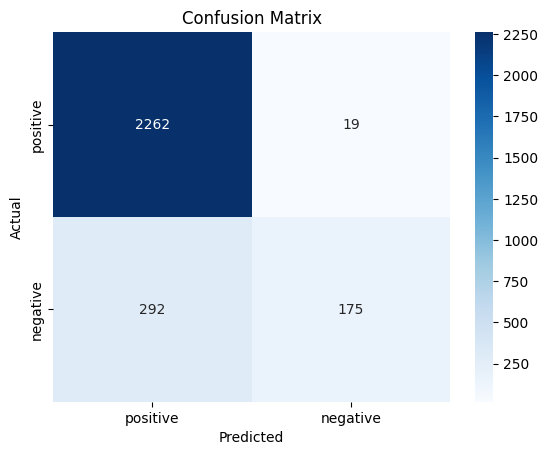


Classification Report:
              precision    recall  f1-score   support

    negative       0.90      0.37      0.53       467
    positive       0.89      0.99      0.94      2281

    accuracy                           0.89      2748
   macro avg       0.89      0.68      0.73      2748
weighted avg       0.89      0.89      0.87      2748



In [8]:
y_pred = model.predict(X_test)

# Accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['positive', 'negative'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['positive', 'negative'], 
            yticklabels=['positive', 'negative'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


In [9]:
# 💬 Test on new hard-coded comments
test_comments = [
    "I absolutely loved this video!",
    "Terrible quality and poor explanation.",
    "Very helpful and easy to understand.",
    "I didn't find it useful at all.",
    "Thanks! That was an awesome tutorial."
]

# Preprocess and vectorize
cleaned_test = [preprocess_text(comment) for comment in test_comments]
X_test_new = vectorizer.transform(cleaned_test)
predictions = model.predict(X_test_new)

# Show results
for comment, prediction in zip(test_comments, predictions):
    print(f"Comment: {comment}\nPredicted Sentiment: {prediction}\n{'-'*50}")


Comment: I absolutely loved this video!
Predicted Sentiment: positive
--------------------------------------------------
Comment: Terrible quality and poor explanation.
Predicted Sentiment: negative
--------------------------------------------------
Comment: Very helpful and easy to understand.
Predicted Sentiment: positive
--------------------------------------------------
Comment: I didn't find it useful at all.
Predicted Sentiment: positive
--------------------------------------------------
Comment: Thanks! That was an awesome tutorial.
Predicted Sentiment: positive
--------------------------------------------------
